In [1]:
from IPython.display import display, Math
import sympy as sym
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

import sympy.plotting.plot as symplot
from matplotlib.patches import Polygon
from scipy.signal import find_peaks

def sep(): print('-' * 64)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------------------------------------------------------------


/home/barrett/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


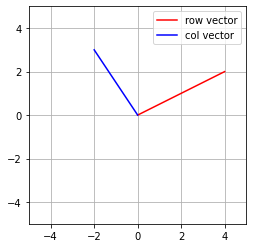

In [4]:
# row and column vectors

row_v = np.array([4,2])
col_v = np.array([[-2], [3]])
display(Math(sym.latex(sym.sympify(row_v))))
display(Math(sym.latex(sym.sympify(col_v))))
sep()

plt.plot([0, row_v[0]], [0, row_v[1]], 'r', label='row vector')
plt.plot([0, col_v[0]], [0, col_v[1]], 'b', label='col vector')

plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid()
plt.legend()

plt.show()

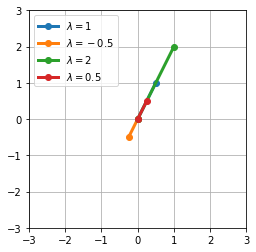

In [8]:
# Adding and scaling vectors
v = np.array([0.5, 1])
s = [1, -0.5, 2, 0.5]

for si in s:
  sv = si * v
  plt.plot([0, sv[0]], [0, sv[1]], 'o-', linewidth=3, label='$\\lambda=%g$' %si)

plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.grid()
plt.legend()

plt.show()


v1 = np.array([-1, 2])
v2 = np.array([1, 1])

v3a = v1 + v2
v3b = np.add(v1, v2)

v3c = np.zeros(2)
for i in range(0,2):
  v3c[i] = v1[i] + v2[i]

In [10]:
# Dot Product
v = np.arange(10, 20, 3)
w = np.arange(5, 15, 3)

dp1 = 0
for i in range(0, len(v)):
  dp1 = dp1 + v[i] * w[i]
  
dp2 = np.sum(np.multiply(v,w))
dp3 = np.dot(v, w)

print(dp1, dp2, dp3)

596 596 596


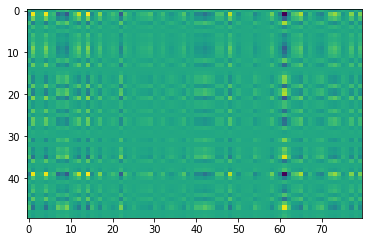

In [11]:
# Outer Product
v1 = np.random.randn(50)
v2 = np.random.randn(80)

op = np.outer(v1, v2)
plt.imshow(op)

plt.show()

(10, 10)
----------------------------------------------------------------
(1, 10)
(10, 1)
(10, 1)
----------------------------------------------------------------


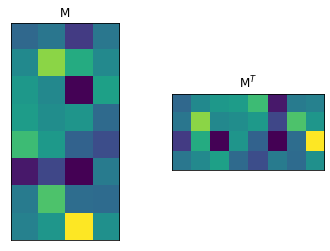

In [18]:
# Matrix Multiplication
A = np.random.randn(14,10)
B = np.random.randn(14,10)
C = np.random.randn(10,14)

# inner dimensions must match
print(np.shape(C@B))
sep()


# Transposing
r = np.random.randn(1,10)
rt1 = np.transpose(r)
rt2 = r.T

print(np.shape(r))
print(np.shape(rt1))
print(np.shape(rt2))
sep()


mat = np.random.randn(8, 4)
matT = mat.T
fig,ax = plt.subplots(1,2)

ax[0].imshow(mat)
ax[0].set_title('M')

ax[1].imshow(matT)
ax[1].set_title('M$^T$')

for i in ax:
  i.set_xticks([])
  i.set_yticks([])

plt.show()

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
----------------------------------------------------------------
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
----------------------------------------------------------------
[[1 0 0 0 0]
 [0 4 0 0 0]
 [0 0 6 0 0]
 [0 0 0 3 0]
 [0 0 0 0 0]]

[1 4 6 3 0]
----------------------------------------------------------------


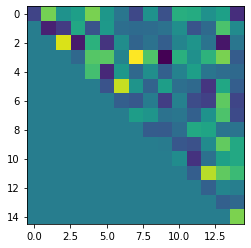

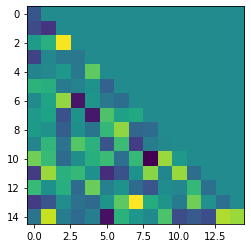

In [24]:
# Special Matrices

# identity matrix
I = np.eye(5)
print(I)
sep()

# zero matrix
Z = np.zeros((4,4))
print(Z)
sep()

# diagonal matrix
D = np.diag([1,4,6,3,0])
print(D)
print()

d = np.diagonal(D)
print(d)
sep()

# triangular matrix
T = np.random.randn(15,15)

plt.imshow(np.triu(T))
plt.show()

plt.imshow(np.tril(T))
plt.show()

[[-1  2 -5  1  2]
 [ 4  2 -4 -1 -2]
 [ 2 -3 -3  4  0]
 [-3 -2  0  2 -2]
 [ 3  1 -2  0  2]]

[[-4.28571429e-01  4.76190476e-02 -5.23809524e-01  1.28571429e+00
   1.76190476e+00]
 [-2.00000000e+00  1.24900090e-15 -4.00000000e+00  9.00000000e+00
   1.10000000e+01]
 [-1.14285714e+00 -9.52380952e-02 -1.95238095e+00  4.42857143e+00
   5.47619048e+00]
 [-2.14285714e+00 -9.52380952e-02 -3.95238095e+00  9.42857143e+00
   1.14761905e+01]
 [ 5.00000000e-01 -1.66666667e-01  8.33333333e-01 -2.00000000e+00
  -2.16666667e+00]]


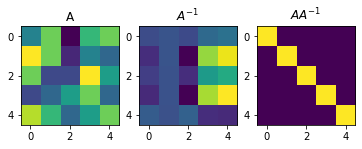

In [29]:
# Matrix Inverse
m = 5
A = np.random.randint(-5, 5, (m,m))
Ainv = np.linalg.inv(A)
print(A)
print()
print(Ainv)

fig,ax = plt.subplots(1,3)
ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(Ainv)
ax[1].set_title('$A^{-1}$')

ax[2].imshow(A@Ainv)
ax[2].set_title('$AA^{-1}$')

plt.show()

In [30]:
# Solve System of Equations
X = np.array([[2,1,-1],[3,4,2],[1,-5,-2]])
y = np.array([1,13,0])

beta1 = np.linalg.inv(X.T@X) @ (X.T@y)
print(beta1)

beta2 = np.linalg.solve(X,y)
print(beta2)

[ 3. -1.  4.]
[ 3. -1.  4.]


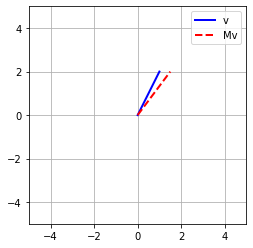

In [32]:
# Visualizing Matrix-Vector Multiplication
M = np.array([[-.5,1],[1,0.5]])
v = np.array([1,2])

Mv = M@v

plt.plot([0, v[0]], [0, v[1]], 'b', linewidth=2, label='v')
plt.plot([0, Mv[0]], [0, Mv[1]], 'r--', linewidth=2, label='Mv')

plt.axis('square')
plt.axis([-5,5,-5,5])
plt.grid()
plt.legend()

plt.show()

In [ ]:
# Eigenvalues and Eigenvectors
